# Apache Access Log

### Carregando as principais bibliotecas

In [1]:
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline
import re
import pandas as pd
import numpy as np

### Métodos para tratamento dos dados

In [2]:
def convToInt(val):
    result = re.sub('\D+', '' , val)
    if result:
        return int(result)
    else:
        return 0

def parse_datetime(x):
    return datetime.strptime(x[1:-3], '%d/%b/%Y:%H:%M')
    
def tratarURI(val):
    result = re.sub('[(\?) (\;)].+', '' , val)
    return result

def convertbytetoMbyte(val):
    return ((val/1024)/1024)

def formatarAspas(var):
    aspa = re.sub('(\")','',var)
    return aspa

### Carregar o arquivo de Access log 

In [3]:
PATH = 'Documents\\Python Scripts\\Vivo\\VIVOCORP'


COLUMNS = ['host','datetime', 'method', 'uri', 'status', 'bytes']

dadosAccesslog = pd.read_csv(PATH + '\\access_brtlvlts0419sl_log.1548979200',
                   sep='\s+',
                   engine='python', 
                   na_values='-', 
                   header=None ,
                   usecols=[0, 3, 5, 6, 8, 9],
                   names=COLUMNS
                             ,
                   converters={
                            'status': convToInt,
                            'bytes': convToInt,
                            'datetime':parse_datetime,
                             'method':formatarAspas
                   }
                   )
dadosAccesslog['uri'] = [tratarURI(x) for x in dadosAccesslog['uri'].values]
dadosAccesslog = dadosAccesslog.set_index('datetime')
dadosAccesslog = dadosAccesslog.sort_values(by='datetime')
dadosAccesslog['Mbytes'] = [convertbytetoMbyte(x) for x in dadosAccesslog['bytes'].values]
dadosAccesslog.head()

C:\Users\Inmetrics\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,host,method,uri,status,bytes,Mbytes
datetime,,,,,,
2019-01-29 21:23:00,10.129.116.250,POST,/vivocorp/start.swe,200,7326,0.006987
2019-01-29 21:23:00,10.129.116.250,POST,/vivocorp/start.swe,200,7326,0.006987
2019-01-29 21:37:00,10.129.116.250,POST,/vivocorp/start.swe,200,7329,0.006989
2019-01-29 21:41:00,10.131.18.82,POST,/vivocorp/start.swe,200,11942,0.011389
2019-01-29 21:43:00,10.128.2.90,POST,/vivocorp/start.swe,200,11942,0.011389


### Total de logs do Arquivo

In [4]:
dfgrupo = dadosAccesslog

dftotal = dfgrupo.agg({'status': ['count']})
dftotal

,status
count,3692726


### Por Quantidade de Status


In [5]:
dfgrupo = dadosAccesslog

dfprocess = dfgrupo.groupby(dfgrupo['status']).agg({    
    'status': ['count']})
dfprocess.sort_values(by=[('status','count')], ascending=True)
dfprocess

,status
,count
status,
200,3126652
204,95
206,476
301,6295
302,141191
303,1546
304,134187
337,1


### Total com Sucesso

In [6]:
dfgrupo = dadosAccesslog.loc[(dadosAccesslog['status'] <= 206) & (dadosAccesslog['status'] != 0)]


dfprocess = dfgrupo.groupby(dfgrupo['status']).agg({    
    'status': ['count']})
dfprocess.sort_values(by=[('status','count')], ascending=True)
dfprocess

,status
,count
status,
200,3126652
204,95
206,476


### Por URL

In [7]:
dfOK = dadosAccesslog.loc[(dadosAccesslog['status'] == 200) 
                        ]

dfOK = dfOK.groupby(['status', 'uri'],sort = True).agg({    
    'status': ['count']
})
dfOK.sort_values(by=[('status', 'count')], ascending=True)
dfOK

status
                                                            count
status uri                                                       
200    /                                                     2912
       /LoginAppV2/                                             6
       /LoginAppV2/captcha.jpg                                297
       /LoginAppV2/changepassword                              14
       /LoginAppV2/css/style.css                             7683
       /LoginAppV2/img/bg.jpg                                7702
       /LoginAppV2/img/refresh.png                             45
       /LoginAppV2/img/vivo-h.jpg                            7693
       /LoginAppV2/img/vivo.jpg                              7698
       /LoginAppV2/js/jquery.min.js                          7690
       /LoginAppV2/js/validacao.js                           7683
       /LoginAppV2/login                                      962
       /LoginAppV2/login.jsp                                19019
       /VivoPages/pages/Logout.html                           925
       /VivoPages/pages/Logout.html?                           79
       /_dav/cs/idcplg                                      19977
       /analytics/res/b_mozilla/actions/UserScripts.js          3
       /analytics/res/b_mozilla/actions/obiaf.Action.js         3
       /analytics/res/b_mozilla/actions/obiaf.ActionEd...       3
       /analytics/res/b_mozilla/actions/obiaf.ActionsB...       3
       /analytics/res/b_mozilla/actions/obiaf.AnswerDa...       3
       /analytics/res/b_mozilla/actions/obiaf.Metadata...       3
       /analytics/res/b_mozilla/answers/actionlink.js           9
       /analytics/res/b_mozilla/answers/actionseditor.js        9
       /analytics/res/b_mozilla/answers/advancededitor.js       3
       /analytics/res/b_mozilla/answers/advancedformat.js       3
       /analytics/res/b_mozilla/answers/analysis/obips...       9
       /analytics/res/b_mozilla/answers/analysis/obips...       9
       /analytics/res/b_mozilla/answers/analysis/obips...       9
       /analytics/res/b_mozilla/answers/analysis/obips...       9
...                                                           ...
       /vivocorp_oui/images/white.gif                        1206
       /vivocorp_oui/images/whiteBGnoise.png                 4898
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...     140
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...      85
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...      39
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...       1
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...       8
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...     408
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...      51
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...     436
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...       5
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...     330
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...     331
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...     329
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...      50
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...      50
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...      44
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...     233
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...       3
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...       1
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...       6
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...       1
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...     300
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...       2
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...     928
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...       2
       /vivocorp_oui/srf1547219619_612/bscripts/all/ap...       2
       /vivocorp_oui/srf154721961

### Métricas do Status 200, 204 e 206

In [8]:
dffreq = dadosAccesslog.loc[(dadosAccesslog['status'].isin(dfprocess.head().index)) ]

arrayFreq = []
for x in dfprocess.head().index:
    print(x)
    print(dffreq.loc[dffreq['status']==x, ['Mbytes']].describe())
    print("\n")

200
             Mbytes
count  3.126652e+06
mean   2.191805e-02
std    4.858990e-01
min    0.000000e+00
25%    1.015663e-03
50%    2.262115e-03
75%    1.240635e-02
max    6.491351e+02


204
       Mbytes
count    95.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0


206
             Mbytes
count  4.760000e+02
mean   8.034146e-02
std    1.386199e-01
min    9.536743e-07
25%    9.536743e-07
50%    2.049160e-02
75%    9.342909e-02
max    7.263031e-01




# Análise

### Tráfego de Mbytes por hora

O objetivo do gráfico abaixo é demonstrar o tráfego de byte médio e máximo por hora, registrado no access log do Apache

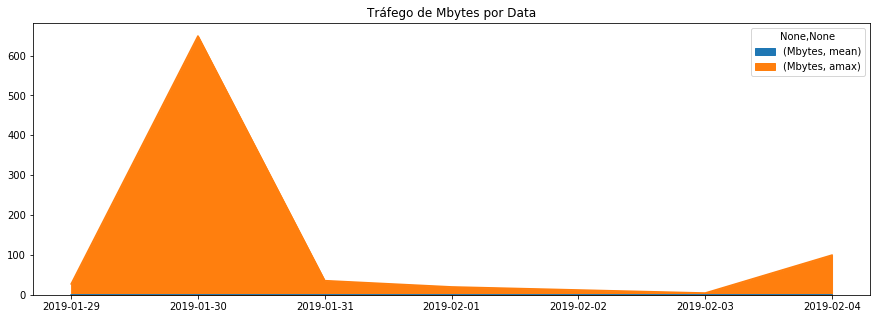

In [20]:
grb = dadosAccesslog.groupby([dadosAccesslog.index.date]).agg({    
    'Mbytes': [np.mean, np.max]
})


grb.plot.area(figsize=(15, 5), title = 'Tráfego de Mbytes por Data')

### URI com maiores Tráficos Médios de bytes

O objetivo de gráfico abaixo e apresentar os maiores 'uri' que trafegam mais bytes

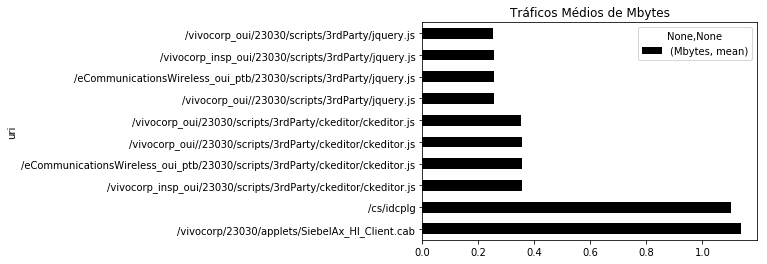

In [21]:
grbUriByte = dadosAccesslog.groupby(dadosAccesslog['uri']).agg({    
    'Mbytes': [np.mean]
})
grbUriByte = grbUriByte.sort_values(by=[('Mbytes','mean')], ascending=False)
grbUriByte.head(10).plot.barh(stacked=True, colormap='copper', title = "Tráficos Médios de Mbytes");


### E entre os maiores 'URI', quais são as frequências de 'MBytes' que eles trafegam

In [22]:
dffreq = dadosAccesslog.loc[(dadosAccesslog['uri'].isin(grbUriByte.head(10).index)) ]

arrayFreq = []
for x in grbUriByte.head(10).index:
    print(x)
    print(dffreq.loc[dffreq['uri']==x, ['uri', 'Mbytes']].describe())
    print("\n")


/vivocorp/23030/applets/SiebelAx_HI_Client.cab
          Mbytes
count  26.000000
mean    1.138304
std     0.334993
min     0.000000
25%     1.233130
50%     1.233130
75%     1.233130
max     1.233130


/cs/idcplg
             Mbytes
count  18671.000000
mean       1.101137
std        3.086921
min        0.000000
25%        0.010243
50%        0.107694
75%        0.600747
max       99.742645


/vivocorp_insp_oui/23030/scripts/3rdParty/ckeditor/ckeditor.js
         Mbytes
count  8.000000
mean   0.356127
std    0.000000
min    0.356127
25%    0.356127
50%    0.356127
75%    0.356127
max    0.356127


/eCommunicationsWireless_oui_ptb/23030/scripts/3rdParty/ckeditor/ckeditor.js
         Mbytes
count  2.000000
mean   0.356127
std    0.000000
min    0.356127
25%    0.356127
50%    0.356127
75%    0.356127
max    0.356127


/vivocorp_oui//23030/scripts/3rdParty/ckeditor/ckeditor.js
         Mbytes
count  2.000000
mean   0.356127
std    0.000000
min    0.356127
25%    0.356127
50%    0.356127
75

## Identificação dos métodos mais Onerosos, pela média do Response Time

In [23]:
teste = dadosAccesslog

##.loc[(dadosAccesslog['status'] == 200)]

teste = teste.groupby(['datetime','method','status','uri'],sort = True).agg({    
    'Mbytes': ['mean', 'max']
})


teste = teste.sort_values(by=[('Mbytes', 'mean')],ascending=False)
#teste.head(10).plot.barh(stacked=True, colormap='copper', figsize=(15, 30));
teste.head(10)

Mbytes  \
                                                                mean   
datetime            method status uri                                  
2019-01-30 07:59:00 POST   200    /analytics/saw.dll       58.594183   
2019-01-30 10:06:00 POST   200    /analytics/saw.dll       34.578745   
2019-02-04 07:22:00 GET    200    /cs/idcplg               34.251799   
2019-02-04 07:48:00 GET    200    /cs/idcplg               29.019892   
2019-02-04 07:13:00 GET    200    /vivocorp_oui/start.swe  22.408905   
2019-01-29 21:47:00 GET    200    /cs/idcplg               19.186295   
2019-01-31 22:56:00 GET    200    /cs/idcplg               15.375401   
2019-01-30 17:12:00 GET    200    /cs/idcplg               11.412018   
2019-01-30 15:48:00 GET    337    /"                       10.736458   
2019-01-30 01:41:00 GET    200    /cs/idcplg               10.337818   

                                                                      
                                                                 max  
datetime            method status uri                                 
2019-01-30 07:59:00 POST   200    /analytics/saw.dll       58.594183  
2019-01-30 10:06:00 POST   200    /analytics/saw.dll       34.578745  
2019-02-04 07:22:00 GET    200    /cs/idcplg               99.742645  
2019-02-04 07:48:00 GET    200    /cs/idcplg               29.019892  
2019-02-04 07:13:00 GET    200    /vivocorp_oui/start.swe  78.410336  
2019-01-29 21:47:00 GET    200    /cs/idcplg               19.186295  
2019-01-31 22:56:00 GET    200    /cs/idcplg               15.375401  
2019-01-30 17:12:00 GET    200    /cs/idcplg               74.957929  
2019-01-30 15:48:00 GET    337    /"                       10.736458  
2019-01-30 01:41:00 GET    200    /cs/idcplg               10.337818

## Gráfico de um determinado Processo (Maior e Média)

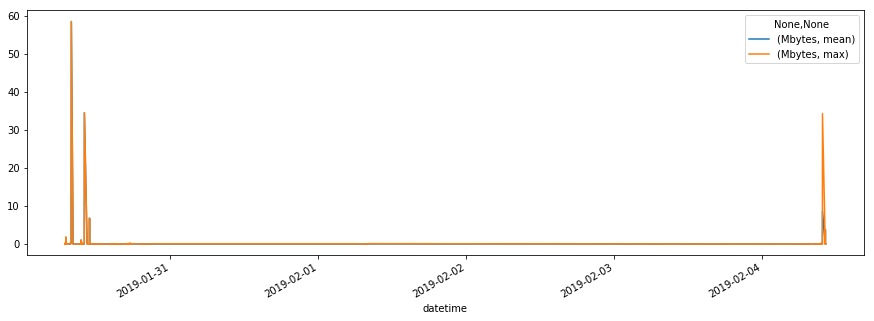

In [15]:
gp_Response = dadosAccesslog.loc[(dadosAccesslog['uri'] == '/analytics/saw.dll')]
gp_Response = gp_Response.groupby(['datetime']).agg({    
    'Mbytes': ['mean', 'max']
})
gp_Response.plot(figsize=(15, 5))

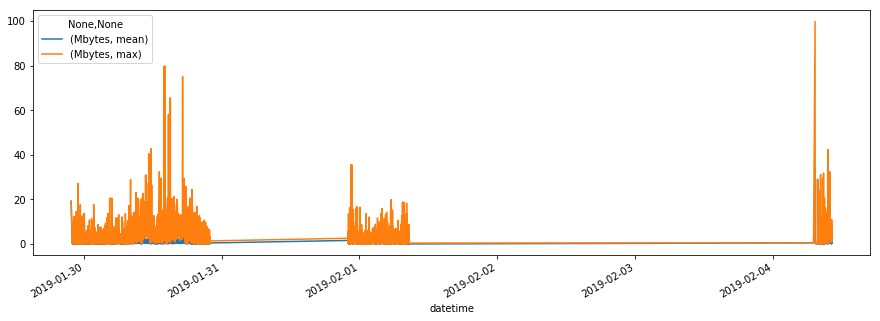

In [16]:
gp_Response = dadosAccesslog.loc[(dadosAccesslog['uri'] == '/cs/idcplg')]
gp_Response = gp_Response.groupby(['datetime']).agg({    
    'Mbytes': ['mean', 'max']
})
gp_Response.plot(figsize=(15, 5))

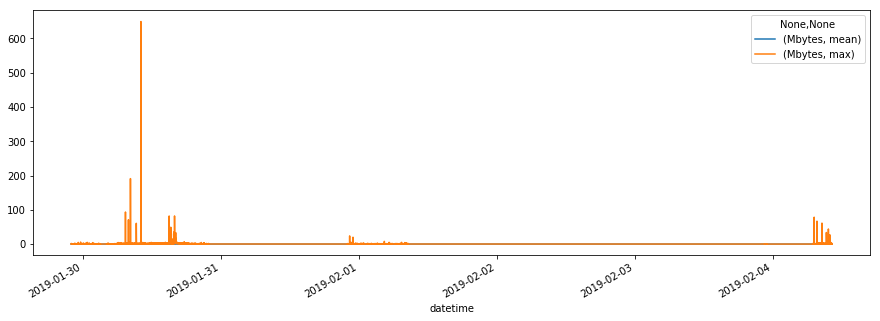

In [18]:
gp_Response = dadosAccesslog.loc[(dadosAccesslog['uri'] == '/vivocorp_oui/start.swe')]
gp_Response = gp_Response.groupby(['datetime']).agg({    
    'Mbytes': ['mean', 'max']
})
gp_Response.plot(figsize=(15, 5))

### Por Quantidade Requisições


In [24]:
dfgrupo = dadosAccesslog

dfprocess = dfgrupo.groupby(dfgrupo['uri']).agg({    
    'uri': ['count']})
dfprocess.sort_values(by=[('uri','count')], ascending=True)
dfprocess

,uri
,count
uri,
/,3145
"/""",67573
/Login,1
/LoginApp,1
/LoginAppV2,2
/LoginAppV2/,6
/LoginAppV2/captcha.jpg,297
/LoginAppV2/changepassword,14


# Erros

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029AC160EE10>],
      dtype=object)

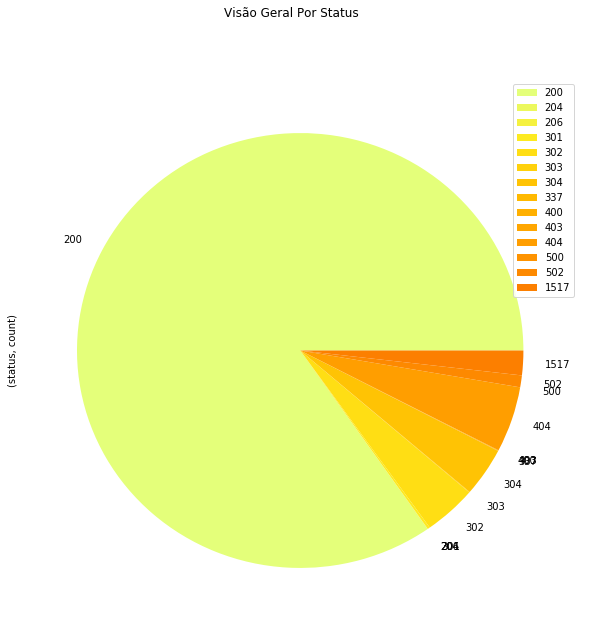

In [25]:
gp_erros_al = dadosAccesslog.groupby(['status']).agg({
    
    'status': ['count']
})
gp_erros_al.plot.pie(subplots=True, figsize=(10, 10), colormap='Wistia', title = 'Visão Geral Por Status', )

### Total de logs com Erro

In [26]:
dftotalerror = dadosAccesslog.loc[(dadosAccesslog['status']!=200) 
                                 & (dadosAccesslog['status']!=204)
                                 & (dadosAccesslog['status']!=206)].agg({    
    'status': ['count']
})

dftotalerror

,status
count,565503


### Porcentagem de erros

In [27]:
dfpercentil = ((dftotalerror*100)/(dftotal))

dfpercentil 

print(dfpercentil)
print('%')

          status
count  15.313971
%


## Gráficos dos Erros

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B58221780>],
      dtype=object)

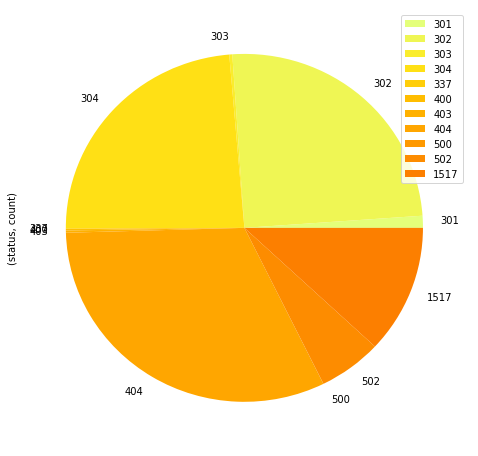

In [28]:
gp_erros_al = dadosAccesslog.loc[(dadosAccesslog['status']!=200) 
                                 & (dadosAccesslog['status']!=204)
                                 & (dadosAccesslog['status']!=206)].groupby(['status']).agg({
    
    'status': ['count']
})
gp_erros_al.plot.pie(subplots=True, figsize=(8, 8), colormap='Wistia')

## Análise dos Erros

In [29]:
teste = dadosAccesslog.loc[(dadosAccesslog['status'] != 200) &
                           (dadosAccesslog['status']!= 204) & 
                           (dadosAccesslog['status'] != 206)]

#.loc[dadosAccesslog.index > '2018-11-5 11')  & (dadosAccesslog.index < '2018-11-5 13')]



teste = teste.groupby(['datetime','method','status','uri'],sort = True).agg({    
    'Mbytes': ['mean', 'max']
})


teste = teste.sort_values(by=[('Mbytes', 'mean')],ascending=False)
#teste.head(10).plot.barh(stacked=True, colormap='copper', figsize=(15, 30));
   
#dadosAccesslog['date_time'] = [formatdatahora(x, y) for x, y in dadosAccesslog[['date','time']].values]
teste.head(10)


Mbytes           
                                            mean        max
datetime            method status uri                      
2019-01-30 15:48:00 GET    337    /"   10.736458  10.736458
2019-02-04 02:00:00 GET    1517   /"    0.831594   5.063828
2019-01-30 02:00:00 GET    1517   /"    0.806168   4.776864
2019-02-04 09:16:00 GET    1517   /"    0.610706  14.032368
2019-02-04 10:19:00 GET    1517   /"    0.600312   6.595682
2019-01-30 11:07:00 GET    1517   /"    0.586495  13.438048
2019-02-01 02:00:00 GET    1517   /"    0.551191   4.747493
2019-01-30 15:35:00 GET    1517   /"    0.426999   4.987749
2019-02-04 10:04:00 GET    1517   /"    0.391411   5.058945
2019-02-04 08:50:00 GET    1517   /"    0.378674   9.071762

### Por Status Erro


In [30]:
dfstatuserro = dadosAccesslog.loc[(dadosAccesslog['status'] != 200) &
                              (dadosAccesslog['status'] != 204) &
                              (dadosAccesslog['status'] != 206) &   
                              (dadosAccesslog['status'] != 0)]


dfprocess = dfstatuserro.groupby(dfstatuserro['status']).agg({    
    'status': ['count']})
dfprocess.sort_values(by=[('status','count')], ascending=True)
dfprocess

,status
,count
status,
301,6295
302,141191
303,1546
304,134187
337,1
400,879
403,1185
404,180105


### Por URL 

In [31]:
dferro = dadosAccesslog.loc[( & (dadosAccesslog['status'] != 204) & (dadosAccesslog['status'] != 206) 
                        ]
dadosAccesslog['status'] != 200)
dferro = dferro.groupby(['status', 'uri'],sort = True).agg({    
    'status': ['count']
})
dferro.sort_values(by=[('status', 'count')], ascending=True)
dferro

status
                                                           count
status uri                                                      
301    /vivocorp                                            5695
       /vivocorp_insp_oui                                      1
       /vivocorp_oui                                         599
302    /LoginAppV2                                             2
       /LoginAppV2/login                                   32029
       /VivoPages/pages                                        2
       /analytics/res/s_FusionFX/uicomponents/obips.Ub...      4
       /cs/idcplg                                            386
       /cs/idcplg/_p/cc-embedded                              33
       /eCommunicationsWireless_oui_ptb/start.swe              4
       /oam/server/logout                                    190
       /oam/server/obrareq.cgi                             19966
       /obrar.cgi                                          25134
       /srv03_mon_ext_hi                                     147
       /srv03_mon_int_hi                                     139
       /srv03_mon_int_oui                                    132
       /srv04_mon_ext_hi                                     130
       /srv04_mon_int_hi                                     139
       /srv04_mon_int_oui                                    146
       /srv05_mon_ext_hi                                     140
       /srv05_mon_int_hi                                     141
       /srv05_mon_int_oui                                    153
       /srv06_mon_ext_hi                                     146
       /srv06_mon_int_hi                                     126
       /srv06_mon_int_oui                                    134
       /srv07_mon_ext_hi                                     143
       /srv07_mon_int_hi                                     142
       /srv07_mon_int_oui                                    149
       /srv08_mon_ext_hi                                     130
       /srv08_mon_int_hi                                     132
...                                                          ...
404    /error/srf1547219619_612/bscripts/all/applet_se...    297
       /error/srf1547219619_612/bscripts/all/applet_si...   2093
       /error/srf1547219619_612/bscripts/all/applet_vi...      7
       /error/srf1547219619_612/bscripts/all/applet_vi...     18
       /error/srf1547219619_612/bscripts/all/applet_vi...      4
       /error/srf1547219619_612/bscripts/all/applet_vi...   4238
       /error/srf1547219619_612/bscripts/all/applet_vi...      2
       /error/srf1547219619_612/bscripts/all/applet_vi...  18208
       /error/srf1547219619_612/bscripts/all/applet_vi...     14
       /oam/server/                                            2
       /v                                                      1
       /vivocorp.                                              1
       /vivocorp/IMAGES/btn_less.gif                        4647
       /vivocorp/IMAGES/bullet_green.gif                    4572
       /vivocorp/blank.htm                                 20948
       /vivocorp_insp/blank.htm                                2
       /vivocorp_insp_oui/%3CDIV%3E%3C/DIV%3E                  1
       /vivocorp_insp_oui/blank.htm                           19
       /vivocorp_oui/%3CDIV%3E%3C/DIV%3E                       7
       /vivocorp_oui//blank.htm                                3
       /vivocorp_oui/blank.htm                              5429
       /vivocorp_oui/js/jquery.min.js                          2
       /vivocorp_oui/login                                     1
       /vivocorp_oui/start.s,we                                1
       /vivocorphttp://vivocorp.vivo.com.br/vivocorp/s...      1
500    /eai_anon_ptb/start.swe                                25
502    /cs/idcplg/_p/cc-embedded                               4
       /cs/idcplg/_p/layout.js                             16148
       /cs/idcplg/_p/skin.cs

### Métricas de Erros

In [32]:
dffreq = dadosAccesslog.loc[(dadosAccesslog['status'].isin(dfprocess.head(8).index)) ]

arrayFreq = []
for x in dfprocess.head(8).index:
    print(x)
    print(dffreq.loc[dffreq['status']==x, ['Mbytes']].describe())
    print("\n")


301
            Mbytes
count  6295.000000
mean      0.000260
std       0.000001
min       0.000252
25%       0.000259
50%       0.000259
75%       0.000259
max       0.000268


302
              Mbytes
count  141191.000000
mean        0.000663
std         0.000729
min         0.000000
25%         0.000210
50%         0.000278
75%         0.000861
max         0.003678


303
            Mbytes
count  1546.000000
mean      0.000189
std       0.000014
min       0.000079
25%       0.000178
50%       0.000187
75%       0.000196
max       0.000242


304
         Mbytes
count  134187.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0


337
          Mbytes
count   1.000000
mean   10.736458
std          NaN
min    10.736458
25%    10.736458
50%    10.736458
75%    10.736458
max    10.736458


400
           Mbytes
count  879.000000
mean     0.000210
std      0.000021
min      0.000000
25%      0.000213
50%      0.000213
75%      0.0

### Converter

In [23]:

# IPython 
import IPython
from IPython.core.display import HTML
from IPython.display import Image



#                 Run (once) to allow nice html output as report (optional) 


"""
Hide code cells in an IPython notebook or exported HTML using javascript. 
Taken from Max Masnick's answer in 
http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer.
"""

# Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html(
    '<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area, .output_stderr").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

CSS = """.input_area .output_stderr {height: 2.0em; overflow: hidden}"""  # changes input_subarea width to 1 visible line
HTML('<style>{}</style>'.format(CSS))

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Click in rendered .html output only, toggles the code</button>''', raw=True)



Click in rendered .html output only, toggles the code